# COMPUTATIONAL HW 1

### MADE BY: CHENGHENG LI CHEN

Execute this cell to install all the requirements.

In [ ]:
!pip install matplotlib
!pip install numpy
!pip install scipy

Libraries to use:

In [86]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.integrate import odeint

# PROBLEM 1

Consider the first order autonomous differential equation

$$
y' = -2 + 5y^2 - y^5.
$$

(a) Plot the right side of the equation,

$$
f(y)=-2 + 5y^2 - y^5,
$$
on the interval $-2 \leq y \leq 2$ (with $y$ on horizontal axis).

Graphically determine how many roots $f$ has and their approximate values.

In [87]:
def f(y):
    return -2 + 5 * y**2 - y**5

In [88]:
y = np.linspace(-2, 2, 100000)
z = f(y)

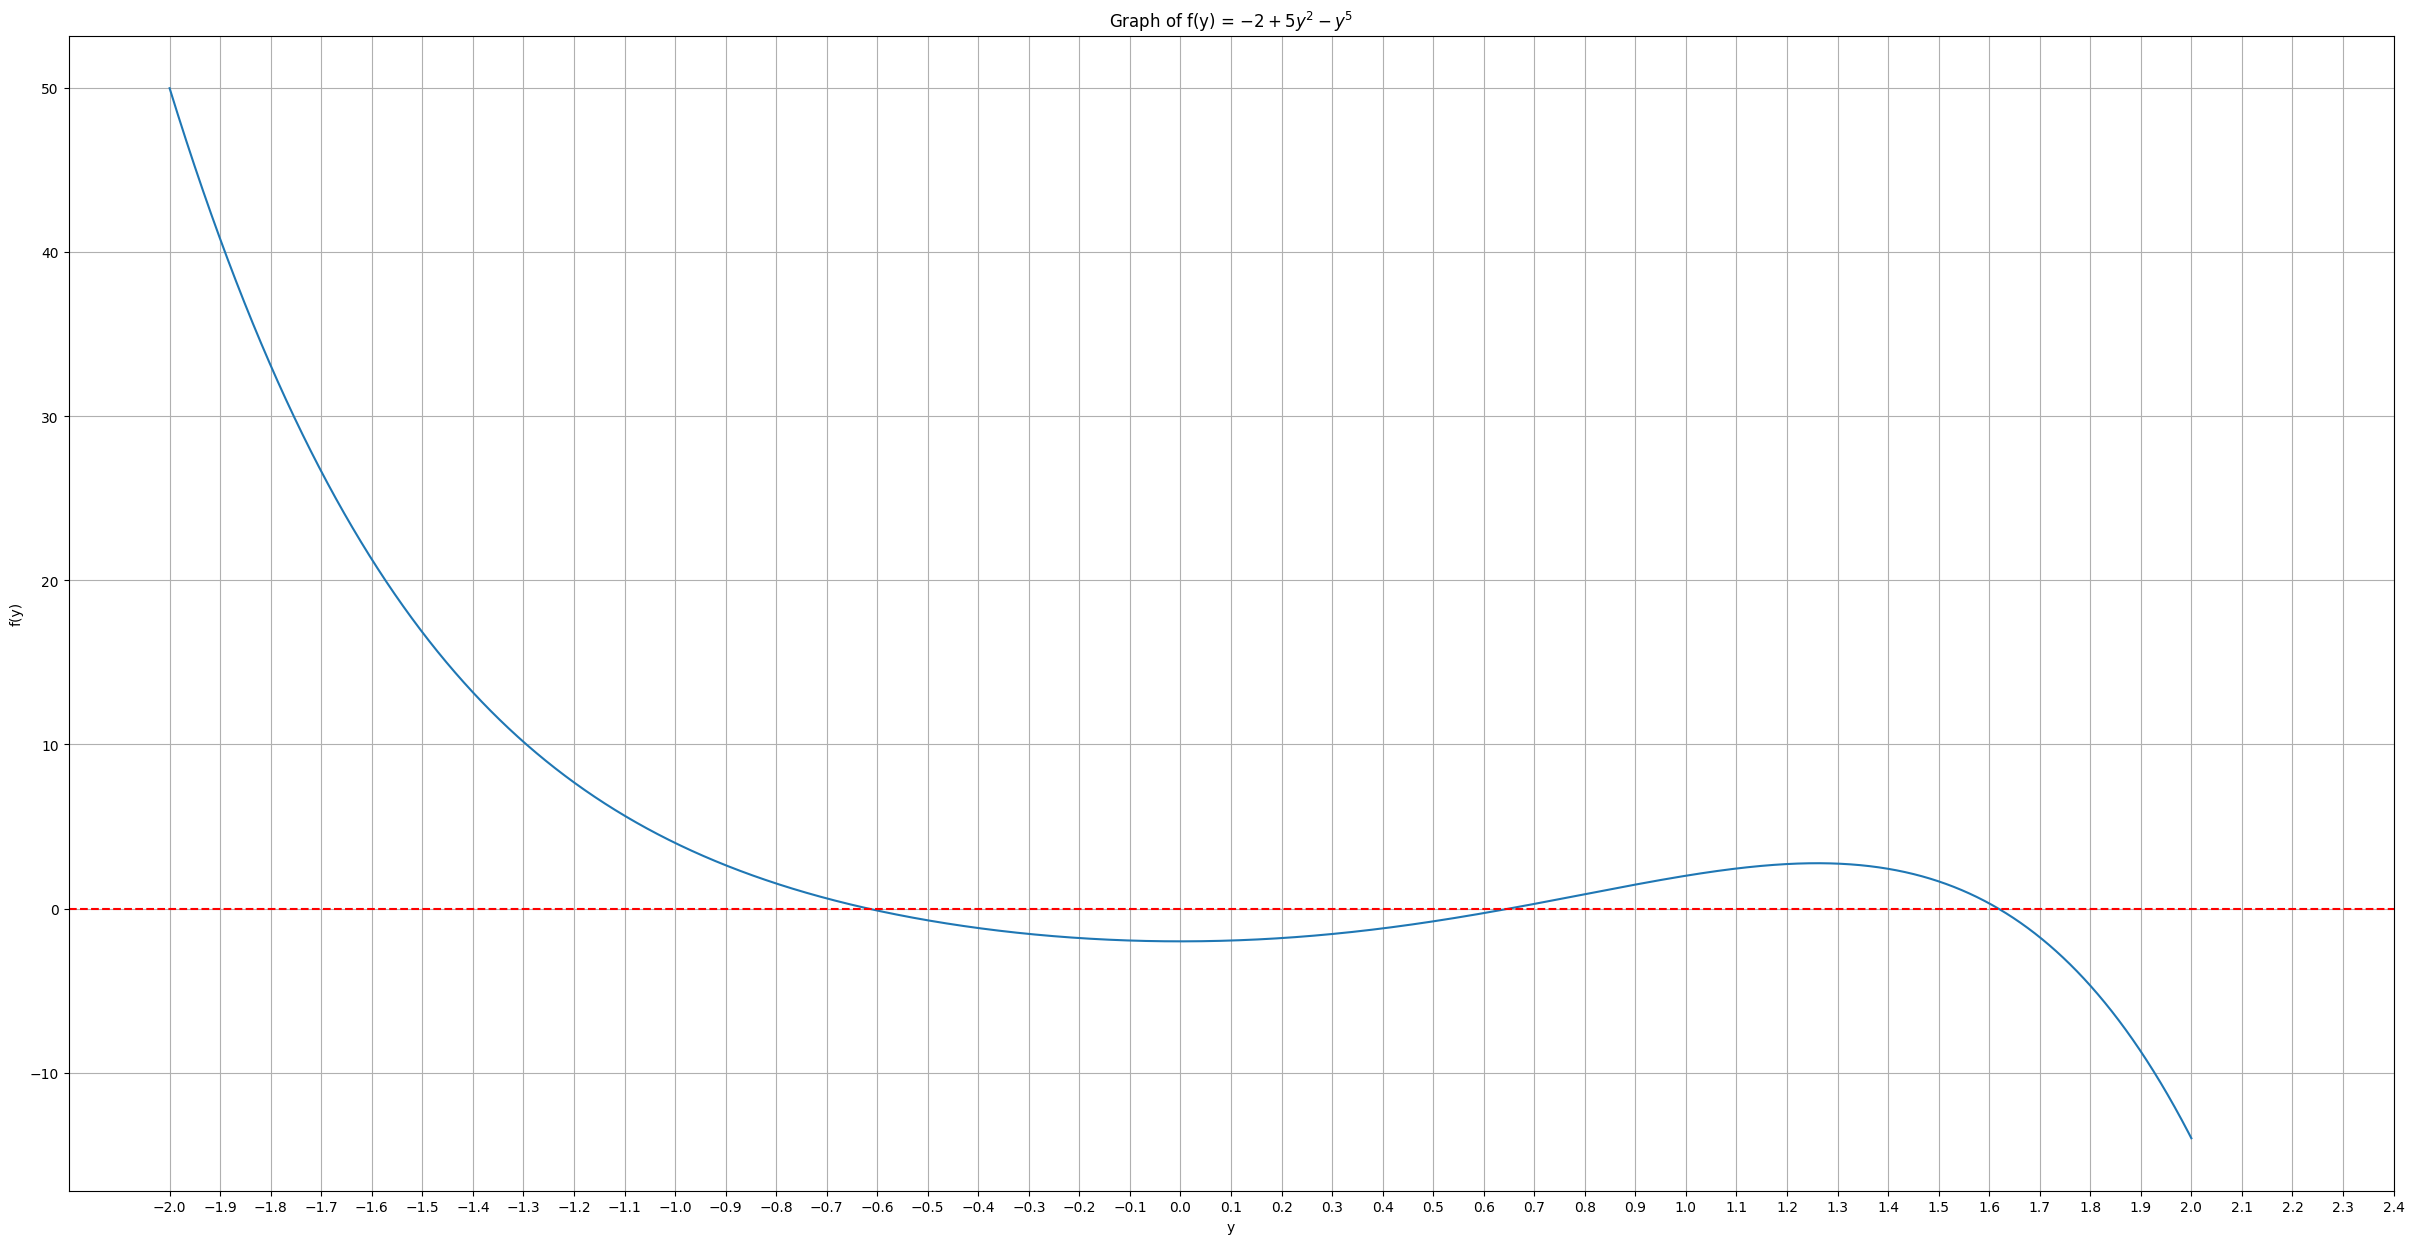

In [89]:
plt.figure(figsize=(30, 15))
plt.plot(y, z)


plt.xlabel('y')
plt.ylabel('f(y)')
plt.title('Graph of f(y) = $-2 + 5y^2 - y^5$')

plt.axhline(0, color='r', linestyle='--', label='y = 0')  # horizontal line for reference
plt.xticks(np.arange(-2, 2.5, 0.1))
plt.grid(True)
plt.show()

We can see in the graph that there are 3 roots since the graph intersects 3 times in with the x axes on the interval given.

We can see aproximately the value of the root in the graph which are:

$y_1 = -0.6$

$y_2 = 0.65$

$y_3 = 1.63$

(b) Plot a direction field and the solutions to the ODE for each of three initial conditions: $y(0) = 0, y(0) = 1$ and $y(0) = 2$.

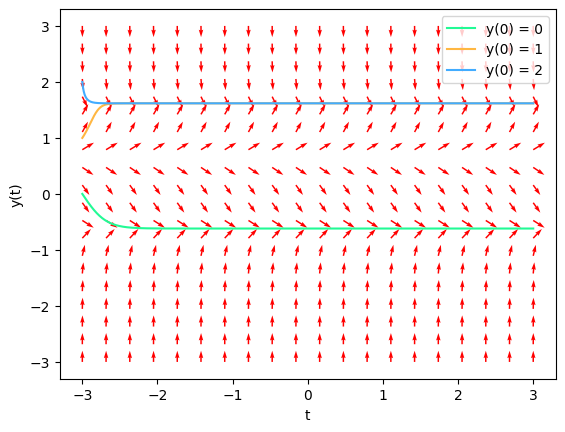

In [90]:
def ode(y, t):
    return -2 + 5 * y**2 - y**5


# Define graph boundaries
max_value = 3
min_value = -max_value

# Plotting solutions
t = np.linspace(min_value, max_value, 1000)

# For each innitail solution plot the solution
y0_values = [0, 1, 2]
colors = ['#22FA95', '#FFB742', '#42ACFF']
for index, y0 in enumerate(y0_values):
    y = odeint(ode, y0, t)
    plt.plot(t, y, color = colors[index] ,label=f"y(0) = {y0}")




# Plotting direction field
# Create the values to plot the direction fields
x = np.linspace(min_value, max_value, 20)  
y = np.linspace(min_value, max_value, 20)  

# Create a grid of (x, y) values
X, Y = np.meshgrid(x, y)

# Calculate the direction at each point on the grid
U = 1  
V = ode(Y, X)

# Normalize the vectors
N = np.sqrt(U**2 + V**2)
U /= N
V /= N

# Plot the direction field
plt.quiver(X, Y, U, V, angles='xy', scale_units='xy', scale=5, color='red')

plt.xlabel('t')
plt.ylabel('y(t)')
plt.legend()
plt.show()

(c) Let $y(t)$ the solution satisfying one of the initial conditions above. Determine the limit

$$
\lim_{t \to \infty} y(t)
$$


for each initial condition.

In the previous graph we can see that the solutions are converging to a number. However, we wanna check this value as the las value computed when t gets bigger.

In [98]:
# Define graph boundaries
max_value = 100000

# Plotting solutions
t = np.linspace(0, max_value, 100000)

# For each innitail solution plot the solution
y0_values = [0, 1, 2]
colors = ['#22FA95', '#FFB742', '#42ACFF']
for index, y0 in enumerate(y0_values):
    y = odeint(ode, y0, t)
    print(f'The limit with the initial value y(0) = {y0} is {y[-1][0]}')

The limit with the initial value y(0) = 0 is -0.6180339887498948
The limit with the initial value y(0) = 1 is 1.618033988749895
The limit with the initial value y(0) = 2 is 1.6180339887498951


Therefore, we can conclude that:

With $y(0) = 0$:
$$
\lim_{t \to \infty} y(t) = -0.618
$$

With $y(0) = 1$:

$$
\lim_{t \to \infty} y(t) = 1.618
$$

With $y(0) = 2$
$$
\lim_{t \to \infty} y(t) = 1.618
$$

# PROBLEM 2

Suppose that a population $y(t)$ satisfies the initial value problem

$$
\frac{dy}{dt} = r(t) - k, y(0) = y_0
$$
where the growth rate $r(t)$ given by

$$
r(t) = \frac{1}{5} (1+sint(t))
$$

and $k$ is a constant (called the rate of predation)

(a) Let $k = 0.2$ Use a numeric ode solver to find an approximation of $y(t)$ the interval $0 \leq t \leq 30$ for each of the initial conditions
$$y(0) = 0.81, 0.82, 0.83, 0.84, 0.85$$

Plot the results in the same figure and include a legend and title.

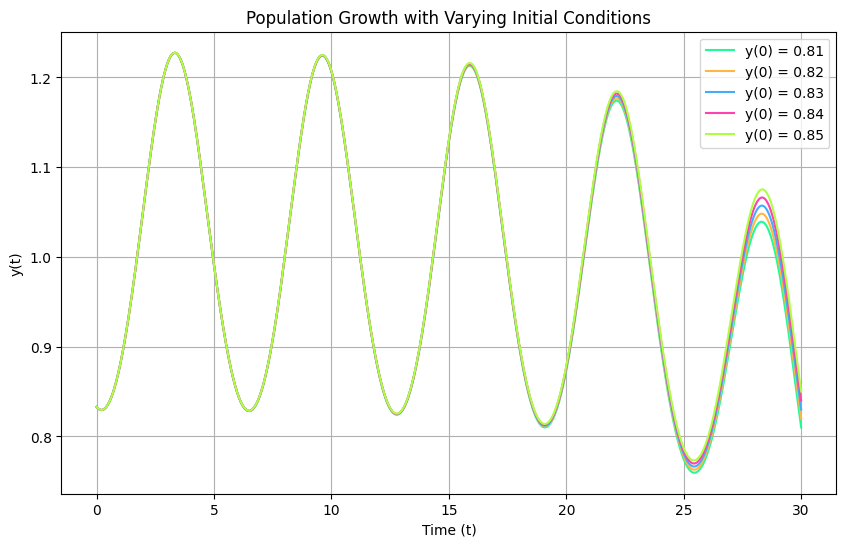

In [108]:
def r(t):
    return 1/5*(1+ np.sin(t))

def ode(y, t, k):
    return r(t)*y - k

# Define graph boundaries
max_value = 0
min_value = 30


k = 0.2


# Plotting solutions
t = np.linspace(min_value, max_value, 1000)


# Create a figure and plot the solutions for each initial condition
plt.figure(figsize=(10, 6))


# For each innitail solution plot the solution
y0_values = [0.81, 0.82, 0.83, 0.84, 0.85]
colors = ['#22FA95', '#FFB742', '#42ACFF', '#FF42AC', '#ACFF42']
for index, y0 in enumerate(y0_values):
    y = odeint(ode, y0, t, args=(k,))
    plt.plot(t, y, color = colors[index] ,label=f"y(0) = {y0}")

# Add labels, legend, and title
plt.xlabel('Time (t)')
plt.ylabel('y(t)')
plt.legend()
plt.title('Population Growth with Varying Initial Conditions')

# Display the plot
plt.grid(True)
plt.show()
